<a href="https://colab.research.google.com/github/AnndyLibeMoore/Catalogo/blob/main/DS_Credit_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**status**: Estado del crédito, indicando la situación
actual del mismo.\
**seniority:** Años de experiencia laboral del solicitante.\
**home**: Tipo de vivienda del solicitante.\
**time:** Plazo del préstamo en meses.\
**age:** Edad del solicitante.\
**marital**: Estado civil del solicitante.\
**records:** Historial de créditos previos del solicitante.\
**job:** Tipo de trabajo o categoría ocupacional.\
**expenses:** Gastos mensuales reportados.\
**income**: Ingresos mensuales del solicitante.\
**assets**: Valor de los ahorros o activos.\
**debt**: Obligaciones financieras actuales.\
**amount**: Monto solicitado en el préstamo.\
**price**: Prima o valor total a devolver por el crédito.

In [2]:
#importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import  classification_report

# 2.Preprocesamiento de datos

In [3]:
#importamos la base y creamos una copia del archivo para trabajarla
x=pd.read_csv('/content/CreditRisk.csv', sep=',')
datos= x.copy()

In [4]:
#convertimos a df
dataset = pd.DataFrame(datos)
dataset.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [5]:
#duplicados
filas_duplicadas = dataset[dataset.duplicated()]
print(filas_duplicadas)

       status  seniority   home  time  age  marital records        job  \
1022  default          5  owner    60   36  married      no  freelance   
2929       ok          4  owner    60   37  married      no  freelance   

      expenses  income  assets  debt  amount  price  
1022        90      62    3000     0     650   1295  
2929        35     128   18000     0     800   1560  


In [6]:
dataset.drop_duplicates(inplace= True)
type(dataset)

pandas.core.frame.DataFrame

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4453 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   status     4453 non-null   object
 1   seniority  4453 non-null   int64 
 2   home       4453 non-null   object
 3   time       4453 non-null   int64 
 4   age        4453 non-null   int64 
 5   marital    4453 non-null   object
 6   records    4453 non-null   object
 7   job        4453 non-null   object
 8   expenses   4453 non-null   int64 
 9   income     4453 non-null   int64 
 10  assets     4453 non-null   int64 
 11  debt       4453 non-null   int64 
 12  amount     4453 non-null   int64 
 13  price      4453 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 521.8+ KB


In [8]:
dataset.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4453.000000,4453.000000,4453.000000,4453.000000,4.453000e+03,4.453000e+03,4.453000e+03,4453.000000,4453.000000
mean,7.988772,46.435661,37.077925,55.565686,7.636598e+05,1.060812e+06,4.045636e+05,1039.162812,1462.891534
std,8.174938,14.655698,10.987312,19.511003,8.705565e+06,1.021984e+07,6.345672e+06,474.600236,628.224253
min,0.000000,6.000000,18.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1117.000000
50%,5.000000,48.000000,36.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


In [9]:
antiguedad = dataset.seniority == 48
dataset[antiguedad]

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
3523,ok,48,owner,36,62,married,no,freelance,60,0,25000,0,180,350


In [10]:
#revisamos registros con ingresos =0
ingresos = dataset.income == 0
dataset[ingresos]

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
113,default,0,owner,36,39,single,no,freelance,35,0,4000,0,1000,1210
143,ok,40,owner,36,58,married,no,freelance,75,0,50000,0,1000,1160
152,ok,27,owner,60,59,married,no,freelance,45,0,11000,0,1100,1300
157,ok,3,owner,48,25,single,no,freelance,35,0,4000,0,1200,1449
176,default,0,rent,60,48,separated,yes,freelance,35,0,25300,15500,1200,1257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4411,ok,40,owner,36,58,married,no,freelance,45,0,26000,0,1500,2554
4420,ok,2,owner,60,27,single,no,others,35,0,40000,23500,2000,2038
4436,default,3,rent,48,26,married,yes,freelance,45,0,0,0,1400,1704
4440,ok,20,owner,60,38,married,no,freelance,60,0,15000,0,1000,1638


In [11]:
#revisamos relación de ingreso 0 y estado default
#vemos que de 347 registros con ingresos 0 solo 197 estan en default,
ingresos_default = (dataset['income'] == 0) & (dataset['status']== 'default')
dataset[ingresos_default]

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
113,default,0,owner,36,39,single,no,freelance,35,0,4000,0,1000,1210
176,default,0,rent,60,48,separated,yes,freelance,35,0,25300,15500,1200,1257
194,default,0,other,36,48,married,yes,freelance,45,0,0,0,1600,2053
240,default,13,rent,24,49,married,no,freelance,90,0,0,0,700,800
241,default,10,rent,60,43,married,no,freelance,90,0,0,0,1350,1668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4333,default,0,rent,36,41,married,no,freelance,35,0,0,0,800,1250
4349,default,5,rent,48,33,married,yes,freelance,60,0,0,0,2000,2652
4368,default,8,parents,60,38,married,no,freelance,60,0,0,0,1300,1480
4373,default,3,private,60,36,married,no,freelance,60,0,3000,120,1600,1689


In [12]:
#de los 347 registros con ingresos 0 190 tienen activos los otros 157 no
ingresos_activos = (dataset['income'] == 0) & (dataset['assets']!= 0)
dataset[ingresos_activos]

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
113,default,0,owner,36,39,single,no,freelance,35,0,4000,0,1000,1210
143,ok,40,owner,36,58,married,no,freelance,75,0,50000,0,1000,1160
152,ok,27,owner,60,59,married,no,freelance,45,0,11000,0,1100,1300
157,ok,3,owner,48,25,single,no,freelance,35,0,4000,0,1200,1449
176,default,0,rent,60,48,separated,yes,freelance,35,0,25300,15500,1200,1257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4398,ok,2,owner,36,24,married,no,freelance,45,0,4000,1900,700,1780
4411,ok,40,owner,36,58,married,no,freelance,45,0,26000,0,1500,2554
4420,ok,2,owner,60,27,single,no,others,35,0,40000,23500,2000,2038
4440,ok,20,owner,60,38,married,no,freelance,60,0,15000,0,1000,1638


In [13]:
ingresos_activos_ = (dataset['income'] == 0) & (dataset['assets']== 0)
default=  dataset['status']== 'default'
activos_default = dataset[ingresos_activos_ & default]
activos_default
#aqui tenemos 124 registros donde el status es default, los ingresos son 0 y los activos 0

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
194,default,0,other,36,48,married,yes,freelance,45,0,0,0,1600,2053
240,default,13,rent,24,49,married,no,freelance,90,0,0,0,700,800
241,default,10,rent,60,43,married,no,freelance,90,0,0,0,1350,1668
277,default,2,rent,60,35,married,yes,freelance,75,0,0,0,1000,1206
317,default,1,rent,60,38,married,no,freelance,45,0,0,0,1500,1850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,default,3,parents,60,29,single,no,freelance,35,0,0,0,1500,2500
4333,default,0,rent,36,41,married,no,freelance,35,0,0,0,800,1250
4349,default,5,rent,48,33,married,yes,freelance,60,0,0,0,2000,2652
4368,default,8,parents,60,38,married,no,freelance,60,0,0,0,1300,1480


## Formateo de columnas

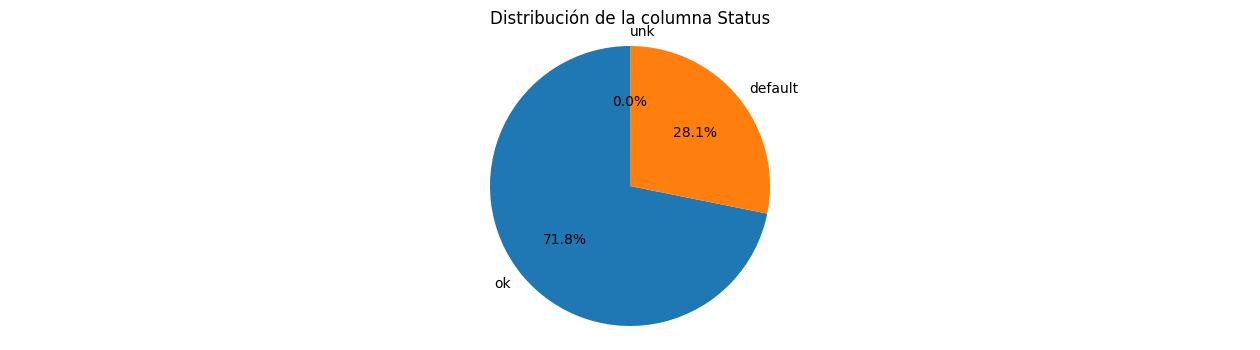

In [14]:
#verficamos la distribuión de status
status_counts = dataset['status'].value_counts()

# Creamos el gráfico pizza
plt.figure(figsize=(16, 4))
plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', startangle=90) #mosttramos % y rotamos para q el circulo empiece de arriba
#título
plt.title('Distribución de la columna Status')
# Aseguramos que el círculo sea perfecto
plt.axis('equal')
plt.show()

In [15]:
dataset.status.unique()

array(['ok', 'default', 'unk'], dtype=object)

In [16]:
dataset.status.value_counts()

,count
status,
ok,3199
default,1253
unk,1


In [17]:
unk =dataset[dataset.status == 'unk']
unk


,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
3309,unk,10,private,60,25,single,no,fixed,35,148,3000,0,1500,1888


In [18]:
#cambiaremos el estado de esta fila q es la unca con unk
#buscamos con loc, la fila donde la busqueda de unk sea True, solo tomando la columna status, añadimos el nuevo valor q sera default
dataset.loc[dataset['status'] == 'unk', 'status'] = 'default'


In [19]:
#verificamos que ahora sea False
unk =dataset[dataset.status == 'unk']
unk

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price


In [20]:
dataset.status.value_counts()

,count
status,
ok,3199
default,1254


In [21]:
#creamos una nueva columna que contendra el default en tipo númerico
dataset['default'] = np.where(dataset['status'].str.lower() == 'default', 1, 0)
dataset.head()
#default = 1
#ok = 0

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846,0
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658,0
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985,1
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325,0
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910,0


In [22]:
#eliminamos status
del dataset['status']
dataset.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,9,rent,60,30,married,no,freelance,73,129,0,0,800,846,0
1,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658,0
2,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985,1
3,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325,0
4,0,rent,36,26,single,no,fixed,46,107,0,0,310,910,0


In [23]:
#reordeno  las columnas
dataset = dataset[['default', 'seniority', 'home', 'time', 'age', 'marital', 'records', 'job', 'expenses', 'income', 'assets', 'debt', 'amount', 'price']]
dataset.head()

,default,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,0,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,0,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,1,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,0,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,0,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [24]:
dataset.default.value_counts()


,count
default,
0,3199
1,1254


## Valores Anómalos

In [25]:
dataset.describe()

,default,seniority,time,age,expenses,income,assets,debt,amount,price
count,4453.000000,4453.000000,4453.000000,4453.000000,4453.000000,4.453000e+03,4.453000e+03,4.453000e+03,4453.000000,4453.000000
mean,0.281608,7.988772,46.435661,37.077925,55.565686,7.636598e+05,1.060812e+06,4.045636e+05,1039.162812,1462.891534
std,0.449834,8.174938,14.655698,10.987312,19.511003,8.705565e+06,1.021984e+07,6.345672e+06,474.600236,628.224253
min,0.000000,0.000000,6.000000,18.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,0.000000,2.000000,36.000000,28.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1117.000000
50%,0.000000,5.000000,48.000000,36.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,1.000000,12.000000,60.000000,45.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1692.000000
max,1.000000,48.000000,72.000000,68.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


<Axes: >

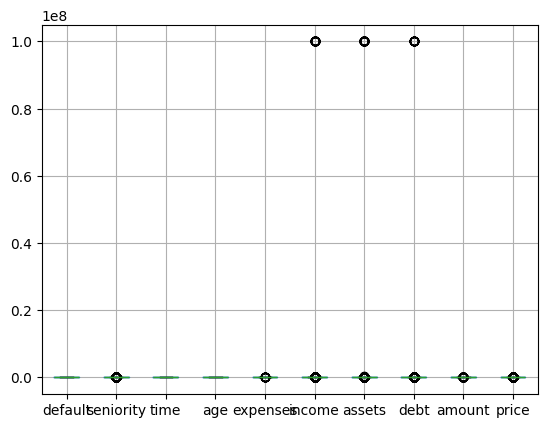

In [26]:
dataset.boxplot()

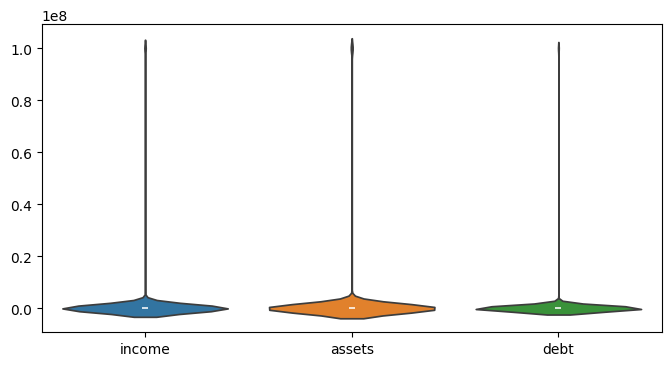

In [27]:
# Crear un gráfico de violín para las tres variables
plt.figure(figsize=(8, 4))
sns.violinplot(data=dataset[['income', 'assets', 'debt']])

# Mostrar el gráfico
plt.show()

In [28]:
outliers = dataset[dataset.income > 100000]
outliers

,default,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
29,1,0,unk,48,37,single,no,unk,35,99999999,99999999,99999999,1500,1850
393,1,1,owner,36,52,married,yes,freelance,60,99999999,100000,20000,1500,2340
803,0,6,parents,24,25,single,no,fixed,35,99999999,5000,0,850,1480
1306,0,12,owner,36,41,married,no,freelance,60,99999999,10000,0,1000,2100
1420,1,0,owner,60,36,married,yes,freelance,75,99999999,6000,0,1650,1861
1436,0,5,rent,24,29,married,no,freelance,45,99999999,0,0,800,1197
1455,1,2,owner,36,19,single,yes,freelance,35,99999999,9000,0,500,1100
1472,0,15,owner,60,40,married,yes,freelance,75,99999999,16000,0,1150,1850
1534,1,1,owner,60,39,married,no,freelance,60,99999999,6000,3000,850,1104
1543,1,10,owner,36,43,married,no,freelance,60,99999999,4500,0,1000,1905


In [29]:
outliers.shape[0]

34

In [30]:
#reemplzamos esos valores por nulos
dataset.replace(99999999, np.nan, inplace=True)

In [31]:
outliers = dataset[dataset.income > 100000]
outliers

,default,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price


## Tratamos nulos

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4453 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   default    4453 non-null   int64  
 1   seniority  4453 non-null   int64  
 2   home       4453 non-null   object 
 3   time       4453 non-null   int64  
 4   age        4453 non-null   int64  
 5   marital    4453 non-null   object 
 6   records    4453 non-null   object 
 7   job        4453 non-null   object 
 8   expenses   4453 non-null   int64  
 9   income     4419 non-null   float64
 10  assets     4406 non-null   float64
 11  debt       4435 non-null   float64
 12  amount     4453 non-null   int64  
 13  price      4453 non-null   int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 521.8+ KB


In [33]:
null = dataset.isnull().sum()
null

,0
default,0
seniority,0
home,0
time,0
age,0
marital,0
records,0
job,0
expenses,0
income,34


In [34]:
#seleccionamos las columnas númericas para evitar errores
num_cols = dataset.select_dtypes(include=np.number)
#actualizamos la columnas númericas de nuestra selección en nuestro df con la media de cada columna
dataset[num_cols.columns] = num_cols.fillna(num_cols.mean())
dataset.head()

,default,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,0,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,0,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,1,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,0,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,0,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910


In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4453 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   default    4453 non-null   int64  
 1   seniority  4453 non-null   int64  
 2   home       4453 non-null   object 
 3   time       4453 non-null   int64  
 4   age        4453 non-null   int64  
 5   marital    4453 non-null   object 
 6   records    4453 non-null   object 
 7   job        4453 non-null   object 
 8   expenses   4453 non-null   int64  
 9   income     4453 non-null   float64
 10  assets     4453 non-null   float64
 11  debt       4453 non-null   float64
 12  amount     4453 non-null   int64  
 13  price      4453 non-null   int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 521.8+ KB


## Histogramas de variables

In [36]:
num_cols = dataset.select_dtypes(include=np.number).columns
num_cols

Index(['default', 'seniority', 'time', 'age', 'expenses', 'income', 'assets',
       'debt', 'amount', 'price'],
      dtype='object')

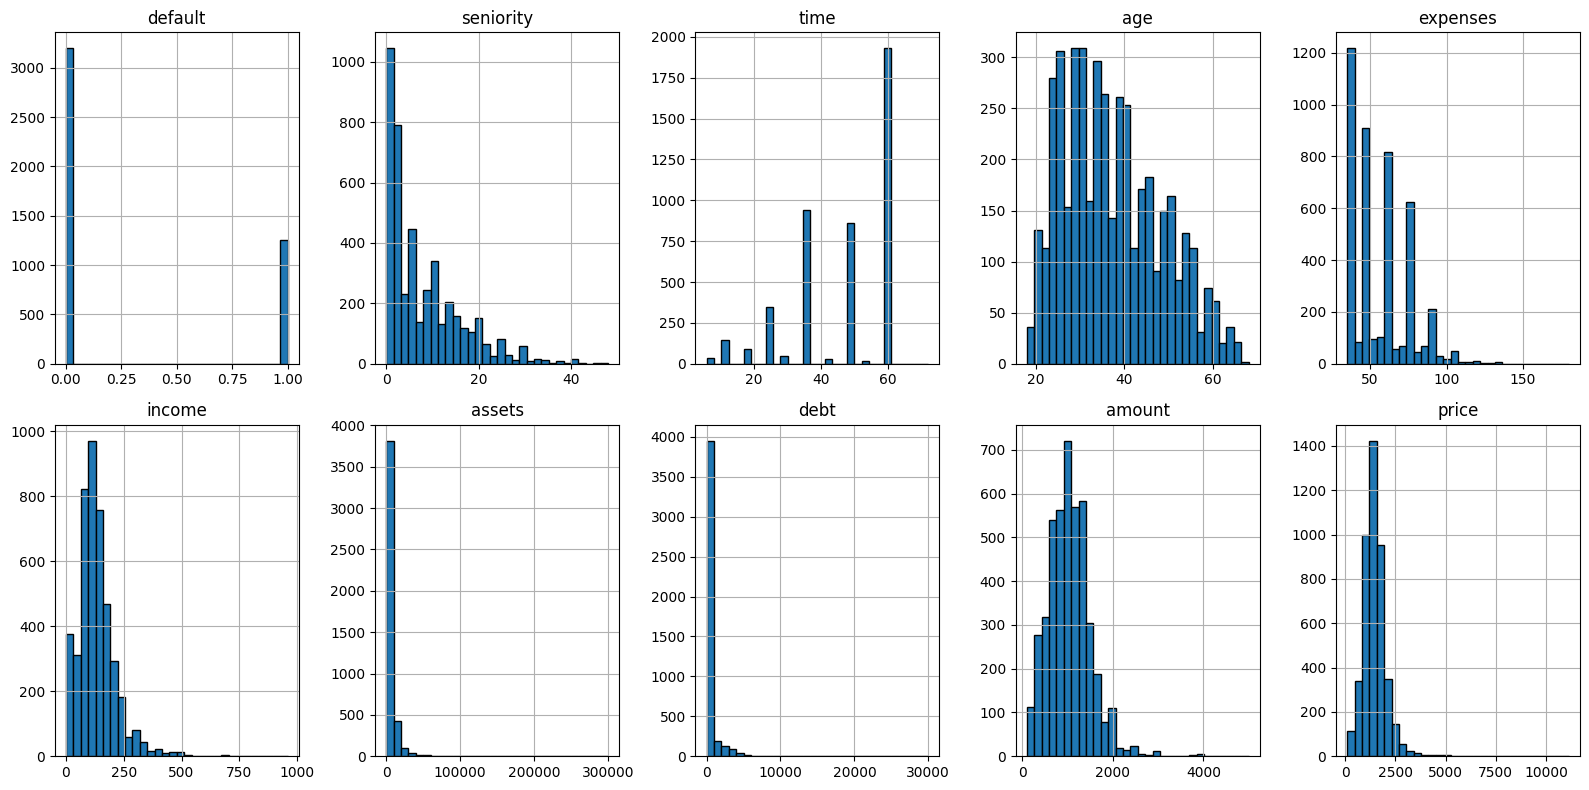

In [37]:
num_cols = dataset.select_dtypes(include=np.number).columns   #seleccionamos columnas númericas
fig, axes = plt.subplots(2,5, figsize=(16, 8))                      #creamos la gráfica 2 col, 5 filas, especificamos tamaño
ax_flat=axes.flatten()                          #aplanamos para facilitar la iteracción, auqneu al ser de 2 columnas es bidimensioal, lo tratara unidemensional para recorrerlo más facilmente

for i, col in enumerate(num_cols):                     #iteramos
    dataset[col].hist(ax=ax_flat[i], bins=30, edgecolor='black')   #gráficamos
    ax_flat[i].set_title(col)

plt.tight_layout()                                #ajustamos espacios
plt.show()                                        #mostramos

## Truncamiento de Valores atípicos

In [38]:
#primero calcularemos los percentiles 95 y 99 de cada columna para decidir qué porcentaje de datos vamos a truncar
percentiles = [0.95, 0.99]  # Percentiles a calcular

# Calculamos los percentiles para cada columna numérica
percentiles_values = dataset.select_dtypes(include=np.number).quantile(percentiles)
percentiles_values

,default,seniority,time,age,expenses,income,assets,debt,amount,price
0.95,1.0,25.0,60.0,57.0,90.00,280.00,18000.0,2459.2,1800.0,2433.80
0.99,1.0,35.0,60.0,63.0,106.48,428.96,50000.0,4774.0,2500.0,3559.48


In [39]:
# Calcular el percentil 95% para cada columna
percentile_95 = dataset.select_dtypes(include=np.number).quantile(0.95)

# Calcular el porcentaje de datos por encima del percentil 95%
porcentaje_por_encima = (dataset[num_cols] > percentile_95).mean() * 100

print("Porcentaje de datos por encima del percentil 95%:")
print(porcentaje_por_encima)

Porcentaje de datos por encima del percentil 95%:
default      0.000000
seniority    3.997305
time         0.022457
age          4.805749
expenses     3.525713
income       4.985403
assets       4.805749
debt         5.007860
amount       4.873119
price        5.007860
dtype: float64


In [40]:
# Calcular el percentil 99% para cada columna
percentile_99 = dataset.select_dtypes(include=np.number).quantile(0.99)

# Calcular el porcentaje de datos por encima del percentil 99%
porcentaje_por_encima = (dataset[num_cols] > percentile_99).mean() * 100

print("Porcentaje de datos por encima del percentil 99%:")
print(porcentaje_por_encima)

Porcentaje de datos por encima del percentil 99%:
default      0.000000
seniority    0.830901
time         0.022457
age          0.830901
expenses     1.010555
income       1.010555
assets       0.898271
debt         1.010555
amount       0.763530
price        1.010555
dtype: float64


In [41]:
num_cols = dataset.select_dtypes(include=np.number).columns
num_cols

Index(['default', 'seniority', 'time', 'age', 'expenses', 'income', 'assets',
       'debt', 'amount', 'price'],
      dtype='object')

In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4453 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   default    4453 non-null   int64  
 1   seniority  4453 non-null   int64  
 2   home       4453 non-null   object 
 3   time       4453 non-null   int64  
 4   age        4453 non-null   int64  
 5   marital    4453 non-null   object 
 6   records    4453 non-null   object 
 7   job        4453 non-null   object 
 8   expenses   4453 non-null   int64  
 9   income     4453 non-null   float64
 10  assets     4453 non-null   float64
 11  debt       4453 non-null   float64
 12  amount     4453 non-null   int64  
 13  price      4453 non-null   int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 521.8+ KB


In [43]:
#nos quedaremos con el 95%
#definimos los límites para el truncamiento
num_cols = dataset.select_dtypes(include=np.number).columns

limits ={
    'income':(dataset['income'].quantile(0.05), dataset['income'].quantile(0.95)),
    'age':(dataset['age'].quantile(0.05), dataset['age'].quantile(0.95)),
    'seniority':(dataset['seniority'].quantile(0.05), dataset['seniority'].quantile(0.95)),
    'time':(dataset['time'].quantile(0.05), dataset['time'].quantile(0.95)),
    'expenses':(dataset['expenses'].quantile(0.05), dataset['expenses'].quantile(0.95)),
    'assets':(dataset['assets'].quantile(0.05), dataset['assets'].quantile(0.95)),
    'debt':(dataset['debt'].quantile(0.05), dataset['debt'].quantile(0.95)),
    'amount':(dataset['amount'].quantile(0.05), dataset['amount'].quantile(0.95)),
    'price':(dataset['price'].quantile(0.05), dataset['price'].quantile(0.95))
}

# Aplicamos la truncación
for col, (lower, upper) in limits.items():               # para cada columna segun limite inferior y superior dado en el diccioinario
    dataset[col] = np.clip(dataset[col], lower, upper)   #aplicamos el truncamiento



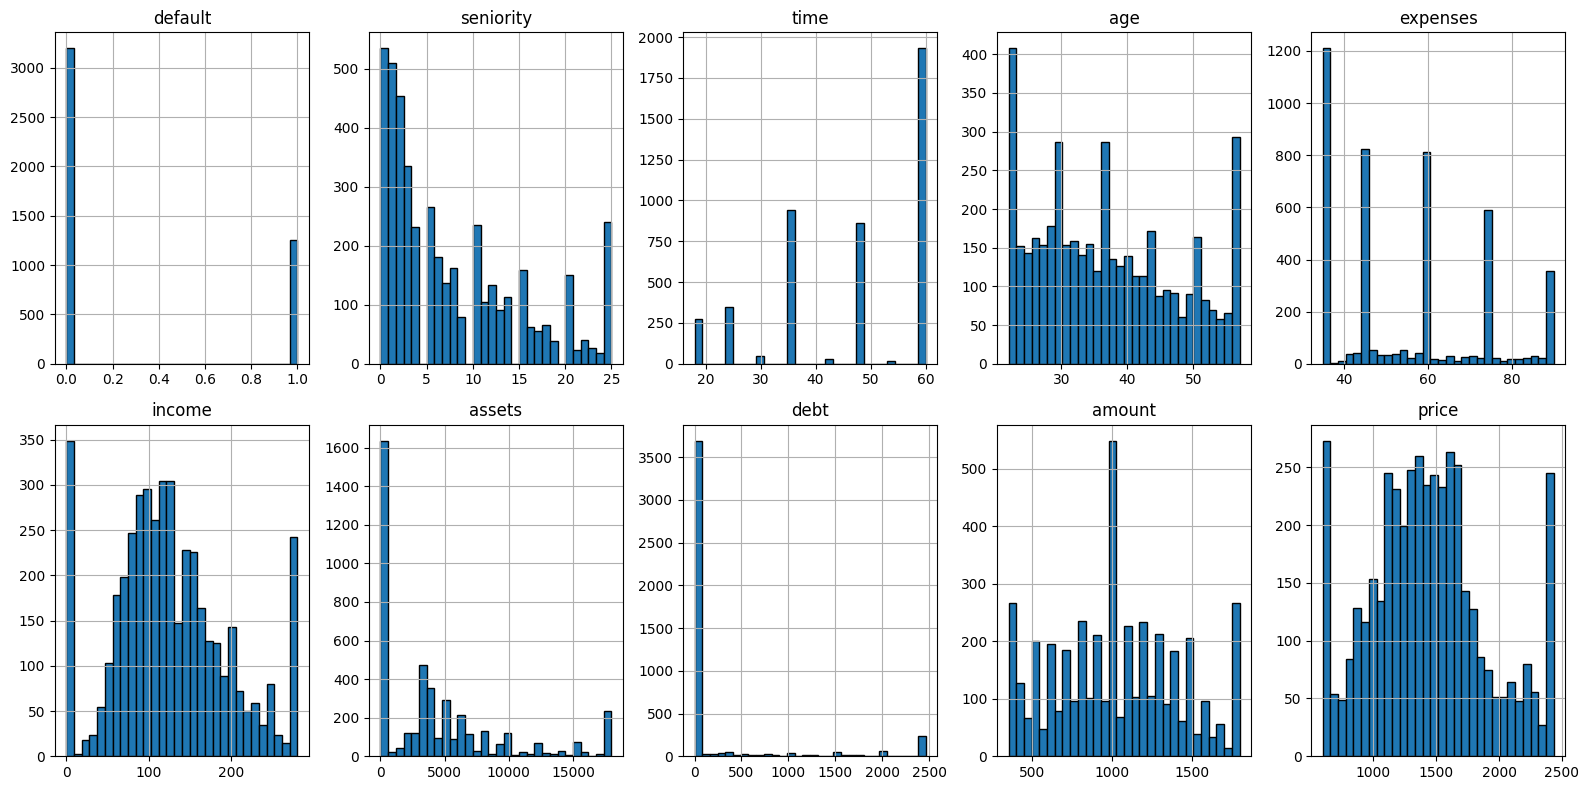

In [46]:
num_cols = dataset.select_dtypes(include=np.number).columns   #seleccionamos columnas númericas
fig, axes = plt.subplots(2,5, figsize=(16, 8))                      #creamos la gráfica 2 col, 5 filas, especificamos tamaño
ax_flat=axes.flatten()                          #aplanamos para facilitar la iteracción, auqneu al ser de 2 columnas es bidimensioal, lo tratara unidemensional para recorrerlo más facilmente

for i, col in enumerate(num_cols):                     #iteramos
    dataset[col].hist(ax=ax_flat[i], bins=30, edgecolor='black')   #gráficamos
    ax_flat[i].set_title(col)

plt.tight_layout()                                #ajustamos espacios
plt.show()